In [1]:
%load_ext watermark
%watermark

%load_ext autoreload
%autoreload 2


# import standard libs
from IPython.display import display
from IPython.core.debugger import set_trace as bp
from pathlib import PurePath, Path
import sys
import time
from collections import OrderedDict as od
import re
import os
import json
import datetime
import pickle


# import python scientific stack
import pandas as pd
import pandas_datareader.data as web
pd.set_option('display.max_rows', 10)
from dask import dataframe as dd
from dask.diagnostics import ProgressBar
from multiprocessing import cpu_count
pbar = ProgressBar()
pbar.register()
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from numba import jit
import math
# import ffn


# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-talk')
plt.style.use('bmh')
#plt.rcParams['font.family'] = 'DejaVu Sans Mono'
plt.rcParams['font.size'] = 9.5
plt.rcParams['font.weight'] = 'medium'
plt.rcParams['figure.figsize'] = 10,7
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)

RANDOM_STATE = 777

print()

Last updated: 2024-09-10T08:54:07.414622-04:00

Python implementation: CPython
Python version       : 3.8.19
IPython version      : 8.12.2

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit




/var/folders/j0/8v9qcjfx15g5ftmsy5n0qrq80000gn/T/ipykernel_77307/2173331131.py:46: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


In [16]:
import os

# Run the setup script
%run ../../config/setup_project.py

# Call the function to set up the project path
setup_project_path()

# Now you can import your modules
from src.utils import helper as h_
import src.ch_02.code_ch_02 as f_ch2
import src.ch_03.code_ch_03 as f_ch3
import src.ch_04.code_ch_04 as f_ch4
import src.ch_05.code_ch_05 as f_ch5
import src.ch_06.code_ch_06 as f_ch6
import src.ch_07.code_ch_07 as f_ch7
import src.ch_08.code_ch_08 as f_ch8


Project root added to sys.path: /Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management
Config path added to sys.path: /Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management/config
Current sys.path: ['/Users/paulkelendji/miniconda3/envs/financial_math/lib/python38.zip', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8/lib-dynload', '', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8/site-packages', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8/site-packages/setuptools/_vendor', '/Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management', '/Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management/config', '/Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management', '/Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management', '/Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management', '/Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management/co

<Figure size 1000x700 with 0 Axes>

In [17]:
MU = 0.0
SIGMA = 0.10
N_INFORMATIF = 5
N_feats = N_INFORMATIF
N_REDUNDANT = 5
N_SAMPLES = 10_000
TIME_UNIT = "D"

In [18]:
# Generate a synthetic dataset
X, cont = f_ch8.getTestData(
    n_features=20,
    n_informative=N_INFORMATIF,
    n_redundant=N_REDUNDANT,
    n_samples=N_SAMPLES,
    time_unit=TIME_UNIT,
)
X

,I_0,I_1,I_2,I_3,I_4,R_0,R_1,R_2,R_3,R_4,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9
1900-01-01,2.105359,2.861661,0.104159,0.686149,1.369429,0.598433,-2.128938,-4.712652,-1.440282,1.734748,-0.951867,0.350871,1.205282,0.518828,-0.126228,0.247306,-1.100988,-1.274187,-1.646382,0.148002
1900-01-02,-0.330754,1.464379,-1.405119,0.396713,-1.722305,2.457629,1.360210,0.598880,-2.769403,2.148379,0.149130,-0.344994,-0.270242,-1.335891,-2.517104,-0.320609,-2.229938,-1.727211,1.524020,-0.171415
1900-01-03,-0.461334,-0.160432,-2.169501,-0.137535,0.398229,0.807388,-0.032925,1.056388,-1.110272,-0.690573,1.385891,-0.994307,-1.020541,-0.671245,-0.013901,0.489610,1.761593,-0.371046,-0.939324,1.923307
1900-01-04,-1.573667,3.110105,0.073939,1.232501,1.069429,2.660115,-0.758505,-1.797288,-0.598249,0.575557,1.374754,0.257797,0.108781,1.233139,0.484138,0.376817,0.491534,1.152249,-1.200973,0.363082
1900-01-05,0.528677,1.538982,-1.603758,2.056413,0.777722,1.574457,-0.717575,-2.730023,-1.430891,0.096802,0.582142,1.279587,-1.104004,-1.288717,0.263587,0.125378,-1.919282,0.146416,-0.973685,1.649327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1938-04-25,0.340564,-2.226446,-1.717539,1.920408,-2.453376,0.293236,2.519037,1.395344,-0.967865,-0.282399,-0.957563,-1.038562,-1.194109,-0.179878,0.199269,1.059701,-1.760693,-1.516575,1.413149,-0.796072
1938-04-26,-2.003425,-2.504737,-2.081414,1.236596,0.386712,0.111086,0.962998,2.678760,1.166288,-3.452708,0.600683,-0.921749,0.121737,0.859804,-1.577469,0.431964,1.702742,-0.380373,-1.704526,2.037676
1938-04-27,-3.191242,-0.151656,-0.376615,-0.944432,-0.663403,1.561986,1.443180,4.092476,0.200656,-0.584434,-0.680881,0.308538,-1.183989,0.243129,0.194844,1.613601,1.033215,0.164618,-0.234480,-0.589038
1938-04-28,-2.116680,-0.735869,-0.858766,0.371223,-1.769760,1.533731,2.261026,3.255705,-0.478828,-0.147101,-1.613138,-0.465080,-0.690141,-0.429827,-0.167966,-1.671002,-1.395534,1.702351,-0.703068,0.049717


In [19]:
# Simulate prices influenced by the first 2 informative features
X_with_prices = h_.prices_features_sim(X, n_feats=N_feats, b0=1_000, drift=MU, sigma=SIGMA)
X_with_prices.head()

,Simulated Price,Influence,I_0,I_1,I_2,I_3,I_4,R_0,R_1,R_2,...,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9
1900-01-01,1000.000000,0.900425,2.105359,2.861661,0.104159,0.686149,1.369429,0.598433,-2.128938,-4.712652,...,-0.951867,0.350871,1.205282,0.518828,-0.126228,0.247306,-1.100988,-1.274187,-1.646382,0.148002
1900-01-02,1000.393892,-0.225201,-0.330754,1.464379,-1.405119,0.396713,-1.722305,2.457629,1.360210,0.598880,...,0.149130,-0.344994,-0.270242,-1.335891,-2.517104,-0.320609,-2.229938,-1.727211,1.524020,-0.171415
1900-01-03,1004.319322,-0.366991,-0.461334,-0.160432,-2.169501,-0.137535,0.398229,0.807388,-0.032925,1.056388,...,1.385891,-0.994307,-1.020541,-0.671245,-0.013901,0.489610,1.761593,-0.371046,-0.939324,1.923307
1900-01-04,1004.320591,0.555515,-1.573667,3.110105,0.073939,1.232501,1.069429,2.660115,-0.758505,-1.797288,...,1.374754,0.257797,0.108781,1.233139,0.484138,0.376817,0.491534,1.152249,-1.200973,0.363082
1900-01-05,999.316267,0.545252,0.528677,1.538982,-1.603758,2.056413,0.777722,1.574457,-0.717575,-2.730023,...,0.582142,1.279587,-1.104004,-1.288717,0.263587,0.125378,-1.919282,0.146416,-0.973685,1.649327


In [20]:
X_No_influence = h_.prices_features_sim(X, n_feats=0, b0=1_000, drift=MU, sigma=SIGMA)
X_No_influence.head()

,Simulated Price,Influence,I_0,I_1,I_2,I_3,I_4,R_0,R_1,R_2,...,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9
1900-01-01,1000.000000,0.0,2.105359,2.861661,0.104159,0.686149,1.369429,0.598433,-2.128938,-4.712652,...,-0.951867,0.350871,1.205282,0.518828,-0.126228,0.247306,-1.100988,-1.274187,-1.646382,0.148002
1900-01-02,1002.430671,0.0,-0.330754,1.464379,-1.405119,0.396713,-1.722305,2.457629,1.360210,0.598880,...,0.149130,-0.344994,-0.270242,-1.335891,-2.517104,-0.320609,-2.229938,-1.727211,1.524020,-0.171415
1900-01-03,997.261084,0.0,-0.461334,-0.160432,-2.169501,-0.137535,0.398229,0.807388,-0.032925,1.056388,...,1.385891,-0.994307,-1.020541,-0.671245,-0.013901,0.489610,1.761593,-0.371046,-0.939324,1.923307
1900-01-04,1007.834340,0.0,-1.573667,3.110105,0.073939,1.232501,1.069429,2.660115,-0.758505,-1.797288,...,1.374754,0.257797,0.108781,1.233139,0.484138,0.376817,0.491534,1.152249,-1.200973,0.363082
1900-01-05,1011.769041,0.0,0.528677,1.538982,-1.603758,2.056413,0.777722,1.574457,-0.717575,-2.730023,...,0.582142,1.279587,-1.104004,-1.288717,0.263587,0.125378,-1.919282,0.146416,-0.973685,1.649327


KeyError: 'Simulated_Price'

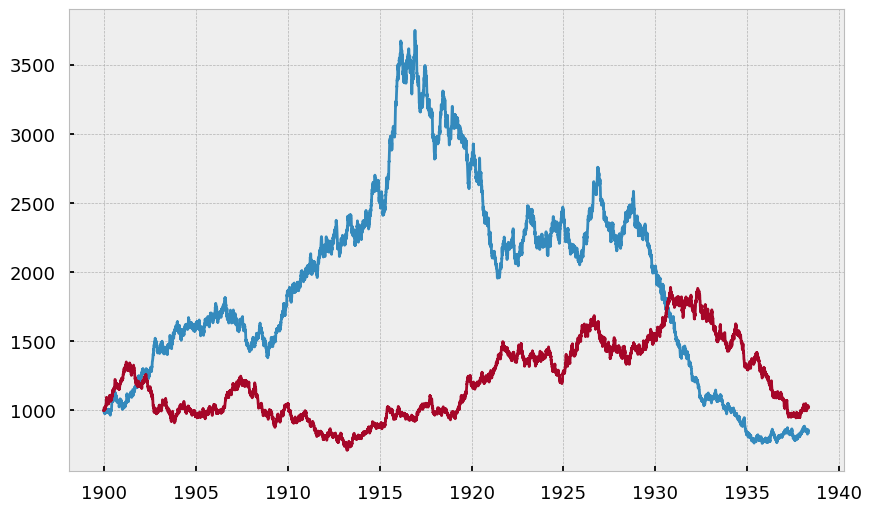

In [21]:
# Plot the simulated prices
plt.figure(figsize=(10, 6))
plt.plot(X_with_prices["Simulated Price"], label="price_Influenced")
plt.plot(X_No_influence["Simulated Price"], label="price_No_Influence")
plt.fill_between(
    X_with_prices.index,
    X_with_prices["Simulated_Price"],
    X_No_influence["Simulated_Price"],
    where=cont["bin"] == 1,
    color="gray",
    alpha=0.3,
)
plt.legend()
plt.show()

<Axes: >

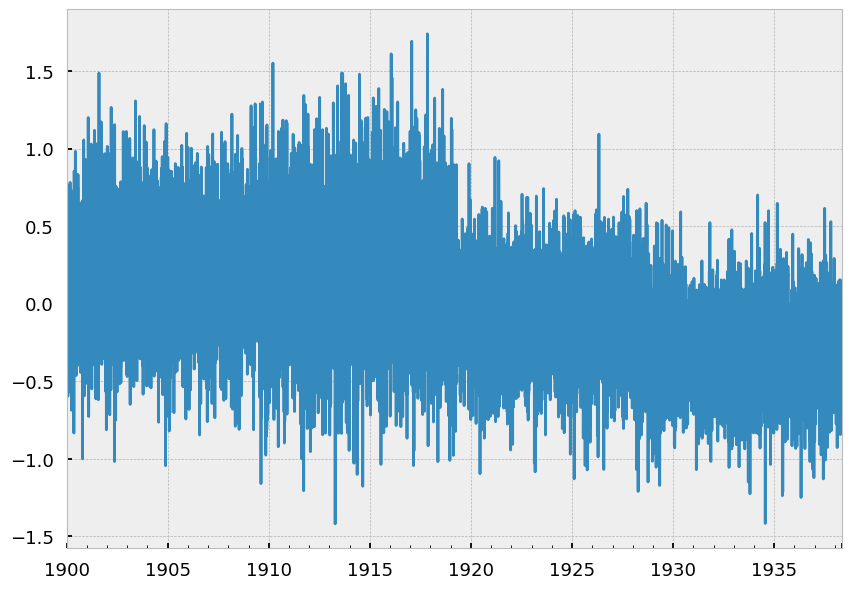

In [22]:
X_with_prices['Influence'].plot()